In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

In [2]:
traindf = pd.read_csv('newtraining.csv')
testdf = pd.read_csv('Testing.csv')

In [3]:
categories = traindf["prognosis"].unique()

encoding = {value: i for i, value in enumerate(categories)}

In [16]:
traindf["prognosis"] = traindf["prognosis"].map(encoding)
testdf["prognosis"] = testdf["prognosis"].map(encoding)

In [17]:
X_train, X_test, y_train, y_test = traindf.iloc[:,:-1], testdf.iloc[:,:-1], traindf["prognosis"], testdf["prognosis"]

In [27]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_score = LR.score(X_test, y_test)
print("LR Accuracy: {:.2f}%".format(LR_score*100))

LR Accuracy: 100.00%


In [28]:
coefficients = np.mean(LR.coef_, axis=0)
importance_threshold = np.quantile(np.abs(coefficients), q=0.25)
low_importance_features = X_train.columns[np.abs(coefficients) < importance_threshold]
X_train_after_selection = X_train.drop(low_importance_features, axis=1)
X_test_after_selection = X_test.drop(low_importance_features, axis=1)

In [29]:
low_importance_features

Index(['chills', 'stomach_pain', 'burning_micturition', 'weight_gain',
       'cold_hands_and_feets', 'restlessness', 'cough', 'yellowish_skin',
       'pain_behind_the_eyes', 'back_pain', 'yellow_urine', 'fluid_overload',
       'obesity', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',
       'swollen_extremeties', 'swelling_joints', 'movement_stiffness',
       'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine',
       'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)',
       'belly_pain', 'receiving_blood_transfusion',
       'receiving_unsterile_injections', 'blood_in_sputum', 'painful_walking',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object')

In [30]:
X_train_after_selection.shape

(4920, 99)

In [ ]:
clf = BernoulliNB(force_alpha=True)
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
svc = SVC(gamma = "auto", kernel = "rbf" )
LR = LogisticRegression()

model_list = [clf, rfc, svc, LR]
acc = []

for model in model_list:
    model.fit(X_train_after_selection, y_train)
    model.predict(X_test_after_selection)
    acc.append(model.score(X_test_after_selection, y_test))

In [34]:
rfc = RandomForestClassifier(random_state = 42, n_estimators = 100)
rfc.fit(X_train_after_selection, y_train)
rfc.predict(X_test_after_selection)
rfc.score(X_test_after_selection, y_test)

0.9761904761904762

Text(0.5, 0, 'Feature Importance')

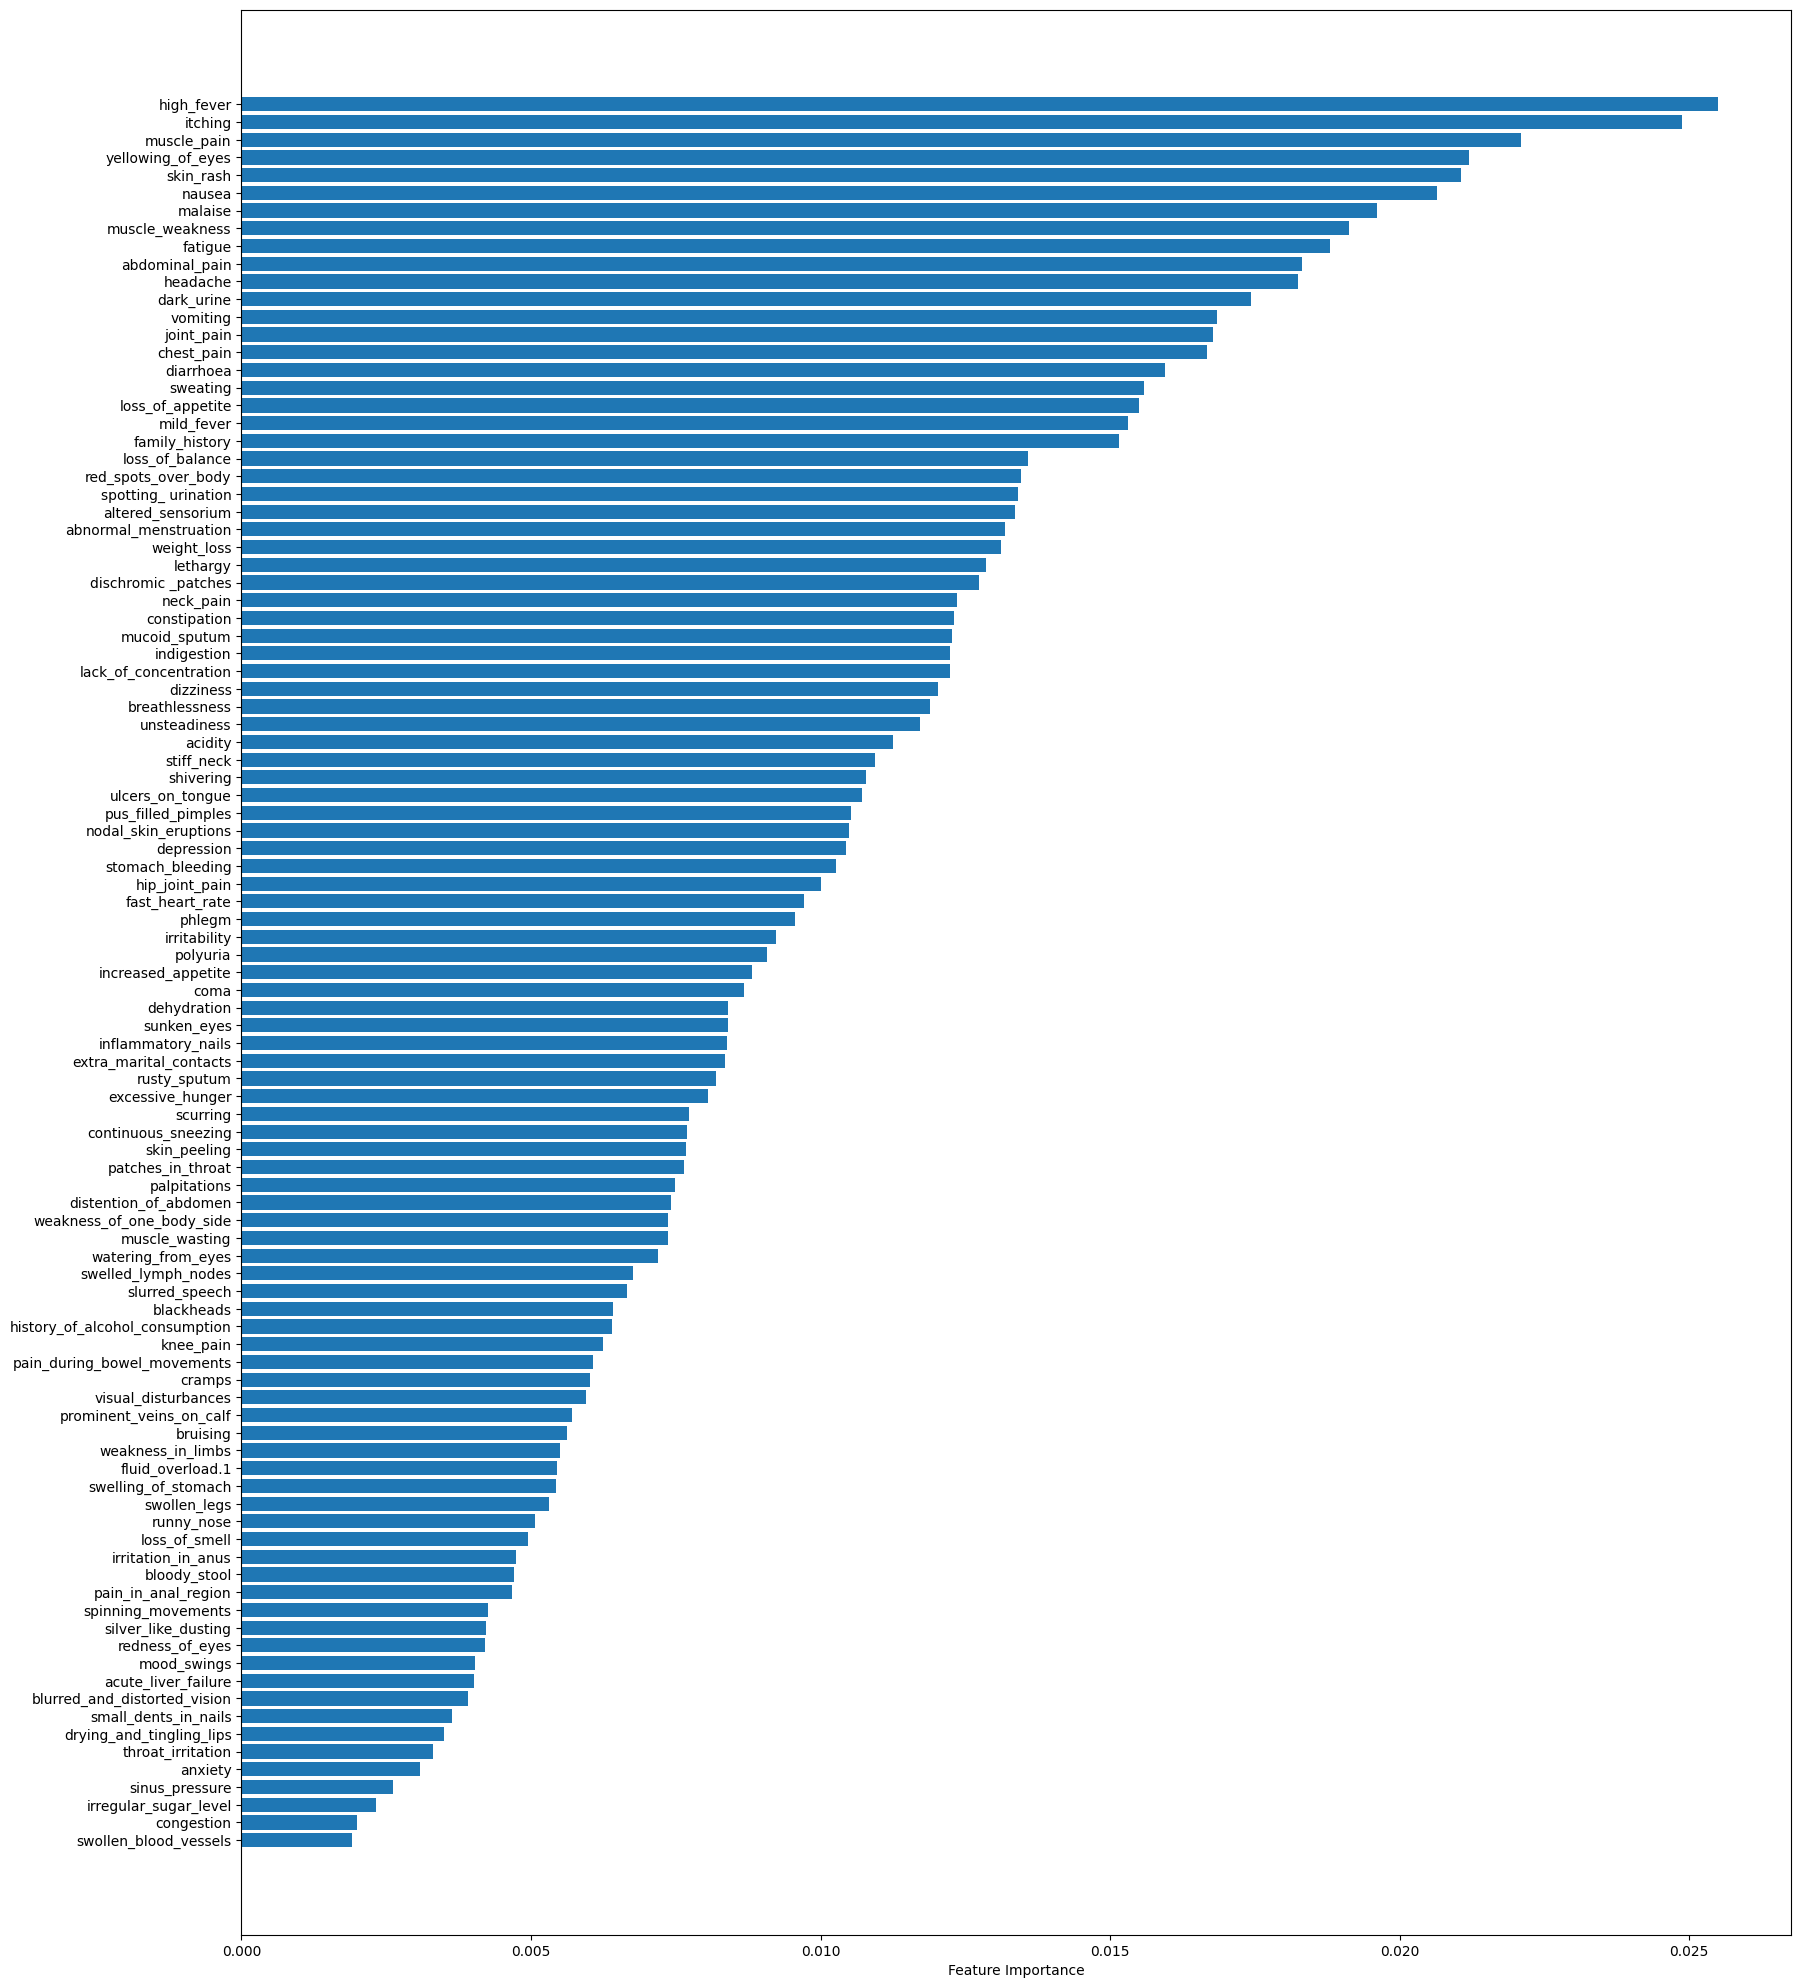

In [50]:
plt.figure(figsize=(20,25))

sort = rfc.feature_importances_.argsort()
plt.barh(X_train_after_selection.columns[sort], rfc.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [44]:
X_train_after_selection.columns[sort]

Index(['swollen_blood_vessels', 'congestion', 'irregular_sugar_level',
       'sinus_pressure', 'anxiety', 'throat_irritation',
       'drying_and_tingling_lips', 'small_dents_in_nails',
       'blurred_and_distorted_vision', 'acute_liver_failure', 'mood_swings',
       'redness_of_eyes', 'silver_like_dusting', 'spinning_movements',
       'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
       'loss_of_smell', 'runny_nose', 'swollen_legs', 'swelling_of_stomach',
       'fluid_overload.1', 'weakness_in_limbs', 'bruising',
       'prominent_veins_on_calf', 'visual_disturbances', 'cramps',
       'pain_during_bowel_movements', 'knee_pain',
       'history_of_alcohol_consumption', 'blackheads', 'slurred_speech',
       'swelled_lymph_nodes', 'watering_from_eyes', 'muscle_wasting',
       'weakness_of_one_body_side', 'distention_of_abdomen', 'palpitations',
       'patches_in_throat', 'skin_peeling', 'continuous_sneezing', 'scurring',
       'excessive_hunger', 'rusty_sputum', 

In [61]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))